# Marketing

# 1. Objective: -

Infer relationship between sales and three media budgets: TV, Radio, and Newspaper.

In [1]:
#import libraries
import pandas as pd
import numpy as np                      
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf

# 2. Load the data: -

In [2]:
df=pd.read_csv(r'C:\Users\yashkundu\Downloads\Advertising.csv',usecols=[1,2,3,4])
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# Understanding Data: -

# 3. View raw data:- 

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# 4. Dimensions of the dataset: -

In [4]:
df.shape

(200, 4)

No. of Rows in Dataset is 200 and No. of Columns in Dataset is 4.

# 5. Data Type: -

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# 6. Null Values: -

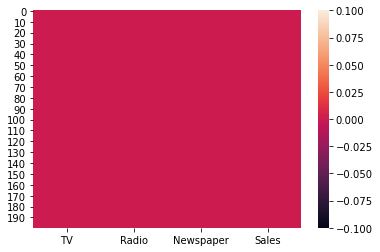

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

The dataset does not contain any null values.

# Exploratory Data Analysis: -

# 7. Describe the data:-

In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


We can see that the min value of Radio is zero. We need to confirm how many zero values existing in the dataset.
For all other columns, the data cleaning is not required. However, the data scaling is required.

Analysis of Zero Values in Predictors: -

In [10]:
(df==0).sum(axis=0)

TV           0
Radio        1
Newspaper    0
Sales        0
dtype: int64

Only one row of Radio variable contain the zero value, which is possible. Hence we conclude the data cleaning steps are not required.

# 8. Relationship between Predictor and Response:-

a) Relationship between Sales and TV:-

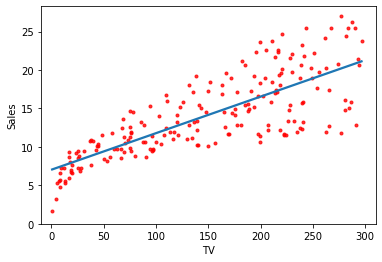

In [12]:
sns.regplot(df.TV, df.Sales, order=1, ci=None, scatter_kws={'color':'r', 's':9}) 
plt.xlim(-10,310)
plt.ylim(bottom=0)
plt.show() 

b) Relationship between Sales and Radio:-

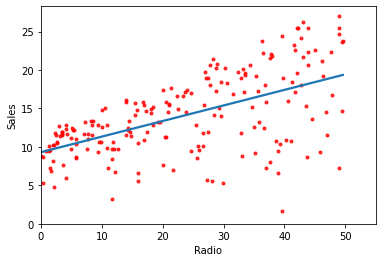

In [13]:
sns.regplot(df.Radio, df.Sales, order=1, ci=None, scatter_kws={'color':'r', 's':9}) 
plt.xlim(0,55)
plt.ylim(bottom=0)
plt.show()

c) Relationship between Sales and Newspaper:-

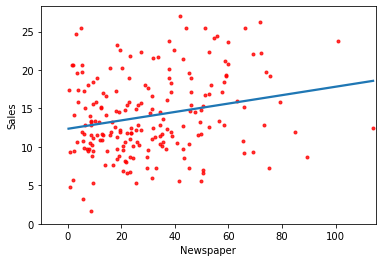

In [14]:
sns.regplot(df.Newspaper, df.Sales, order=1, ci=None, scatter_kws={'color':'r', 's':9}) 
plt.xlim(-10,115)
plt.ylim(bottom=0)
plt.show()

# 9. Data Normalization:-

In [15]:
X = scale(df.TV, with_mean=True, with_std=False).reshape(-1,1)
y = df.Sales

In [16]:
X[0:5]

array([[  83.0575],
       [-102.5425],
       [-129.8425],
       [   4.4575],
       [  33.7575]])

In [17]:
X.mean()

1.0089706847793422e-14

In [18]:
X.std()

85.63933175679269

# Data Modeling: -

# 10. Linear Regression for Scaled Data using sklearn:-

In [19]:
regr = skl_lm.LinearRegression()
regr.fit(X,y)

LinearRegression()

In [20]:
regr.intercept_

14.0225

In [21]:
regr.coef_

array([0.04753664])

a) Calculate RSS:-

In [22]:
min_rss = np.sum((regr.intercept_+regr.coef_*X - y.values.reshape(-1,1))**2)
min_rss

2102.5305831313512

b) Calculate MSE:-

In [23]:
mse = min_rss/len(y) 
mse

10.512652915656757

c) R-Sq using Sklearn:-

In [24]:
Sales_pred = regr.predict(X)
r2_score(y, Sales_pred) 

0.611875050850071

d) MSE using Sklearn:-

In [25]:
mean_squared_error(y, Sales_pred)

10.512652915656757

# 11. Linear Regression for Unscaled Data:-

In [26]:
regr = skl_lm.LinearRegression()
X = df.TV.values.reshape(-1,1)
y= df.Sales

regr.fit(X,y)

LinearRegression()

In [27]:
regr.intercept_

7.032593549127694

In [28]:
regr.coef_

array([0.04753664])

a) Calculate RSS:-

In [29]:
min_rss = np.sum((regr.intercept_+regr.coef_*X - y.values.reshape(-1,1))**2)
min_rss

2102.5305831313517

b) Calculate MSE:-

In [30]:
mse = min_rss/len(y) 
mse

10.512652915656759

c) R-Sq using Sklearn:-

In [31]:
Sales_pred = regr.predict(X)
r2_score(y, Sales_pred) 

0.611875050850071

d) MSE using Sklearn:-

In [32]:
mean_squared_error(y, Sales_pred)

10.512652915656759

# 12. Regression using Statsmodel:-

In [33]:
est = smf.ols('Sales ~ TV', df).fit()

est.summary()        

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 05 May 2021   Prob (F-statistic):           1.47e-42
Time:                        21:48:38   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

a) Parameters:-

In [34]:
est.params

Intercept    7.032594
TV           0.047537
dtype: float64

b) RSS:-

In [35]:
((df.Sales - (est.params[0] + est.params[1] * df.TV))** 2).sum()

2102.530583131351

c) MSE:-

In [36]:
((df.Sales - (est.params[0] + est.params[1]*df.TV))** 2).sum()/len(df.Sales)

10.512652915656753

# 13. Single Linear Regression:-

a) Linear Regression Sales and Radio:-

In [37]:
est = smf.ols('Sales ~ Radio', df).fit()

print(est.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
Radio          0.2025      0.020      9.921      0.000       0.162       0.243


Check the p-value of Intercept and Radio.
It shows that there is a relationship between Sales and Radio.

b) Linear Regression Sales and Newspaper:-

In [38]:
est = smf.ols('Sales ~ Newspaper', df).fit()

print(est.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.001       0.022       0.087


Check the p value of Intercept and Newspaper.
It shows that there is a relationship between Sales and Newspaper.

c) Linear Regression Sales and TV:-

In [39]:
est = smf.ols('Sales ~ TV', df).fit()

print(est.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053


Check the p value of Intercept and TV. 
It shows that there is a relationship between Sales and TV.

# 14. Multiple Linear Regression:-

In [40]:
est = smf.ols('Sales ~ TV + Radio + Newspaper', df).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 05 May 2021   Prob (F-statistic):           1.58e-96
Time:                        21:48:47   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Check the p value of TV, Radio and Newspaper.

# 15. Correlation Matrix:-

In [41]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


# Summary:-

1. First we know the objective of doing this project i.e. Infer relationship between sales and three media budgets: TV, Radio, and Newspaper.

1. Then, we import all the libraries that we use in this project.

2. Then, we load the given data.

3. After that we understand the data using following terms:-

  a) View the raw data with the help of .head() function which shows the first five columns of the data.
   
  b) Dimension of the data with the help of .shape function which gives the no. of columns and rows in the given dataset.
  
  c) Data types of the data with the help of .info() function which gives the whole information of the dataset.
  
  d) Null values of the data with the help of .isnull() function which shows the null value in the given dataset.
  
4. After that we do EDA(Exploratory Data Analysis) which consist the following terms:-

  a) Statistical data analysis with the help of .describe() function which gives count,mean,std,min etc.
 
  b) Relationship - Predictor and Response:-
    
    i)  Find the relationship between Sales and TV.
    
    ii) Find the relationship between Sales and Radio.
    
    iii) Find the relationship between Sales and Newspaper.
   
  c) Data Normalization. 

5. After that we do Data Modelling which consist following terms:-
  
  a) Linear Regression for Scaled Data using sklearn:- In this model we calculate the parameters i.e. intercepts and coefcients, calculate RSS,MSE,etc.
 
  b) Linear Regression for Unscaled Data using sklearn:- In this model we also calculate the parameters i.e. intercepts and coefcients, calculate RSS,MSE,R-sq etc. for unscaled data.
  
  c) Regression using Statsmodel:- In this model we can easily calculate all the values with the help of .summary() method.
  
  d) Single Linear Regression:- In this model we check the p-value and the relationship between sales and three media budgets one by one.
  
  e) Multiple Linear Regression:- In this model we also check the p-value and the relationship between sales and three media budgets at the same time.

6. At last we create the correlation matrix of the given dataset. 